In [31]:
# This code is not imp to understand

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [5]:
df['species'] = encoder.fit_transform(df['species'])

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df = df[df['species'] != 0][['sepal_length', 'petal_length', 'species']]

In [8]:
df.head()

,sepal_length,petal_length,species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


In [9]:
import matplotlib.pyplot as plt

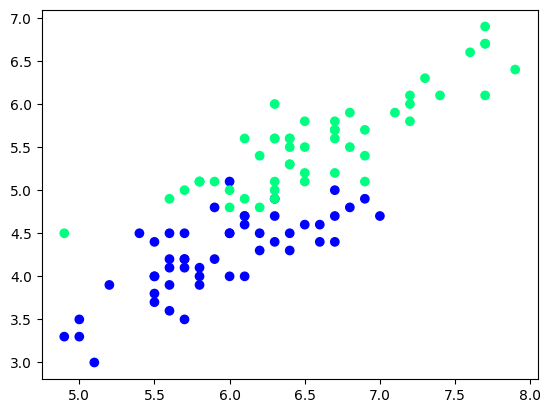

In [10]:
plt.scatter(df['sepal_length'], df['petal_length'], c=df['species'], cmap='winter')

In [11]:
# taking 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60, : ].sample(10)
df_val = df.iloc[60:80, : ].sample(5)
df_test = df.iloc[80:, :].sample(5)

In [12]:
df_train

,sepal_length,petal_length,species
84,5.4,4.5,1
138,6.0,4.8,2
142,5.8,5.1,2
96,5.7,4.2,1
109,7.2,6.1,2
77,6.7,5.0,1
94,5.6,4.2,1
111,6.4,5.3,2
58,6.6,4.6,1
78,6.0,4.5,1


In [13]:
df_val

,sepal_length,petal_length,species
122,7.7,6.7,2
90,5.5,4.4,1
54,6.5,4.6,1
74,6.4,4.3,1
118,7.7,6.9,2


In [14]:
df_test

,sepal_length,petal_length,species
71,6.1,4.0,1
61,5.9,4.2,1
97,6.2,4.3,1
62,6.0,4.0,1
76,6.8,4.8,1


In [15]:
X_test = df_val.iloc[:, 0:2].values
y_test = df_val.iloc[:, -1].values

In [16]:
X_test

array([[7.7, 6.7],
       [5.5, 4.4],
       [6.5, 4.6],
       [6.4, 4.3],
       [7.7, 6.9]])

In [17]:
y_test

array([2, 1, 1, 1, 2])

## Case 1 - Bagging

In [35]:
# row sampling with replacement

In [18]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [20]:
# Data for Tree 1
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:, -1]

df_bag

,sepal_length,petal_length,species
78,6.0,4.5,1
78,6.0,4.5,1
77,6.7,5.0,1
142,5.8,5.1,2
138,6.0,4.8,2
84,5.4,4.5,1
111,6.4,5.3,2
77,6.7,5.0,1


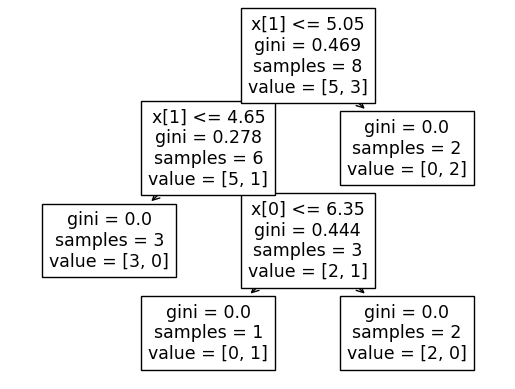

C:\Users\susha\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\susha\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


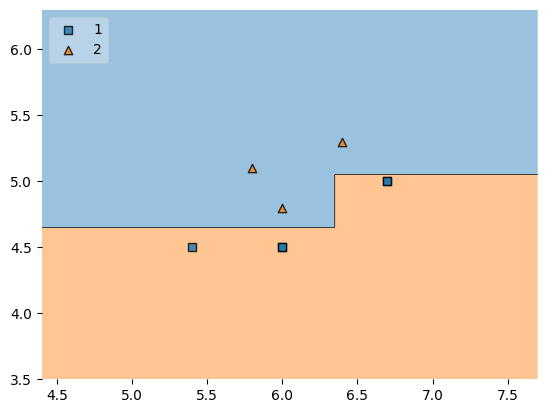

In [22]:
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1,X,y)

In [23]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_length,petal_length,species
84,5.4,4.5,1
109,7.2,6.1,2
58,6.6,4.6,1
84,5.4,4.5,1
94,5.6,4.2,1
111,6.4,5.3,2
78,6.0,4.5,1
109,7.2,6.1,2


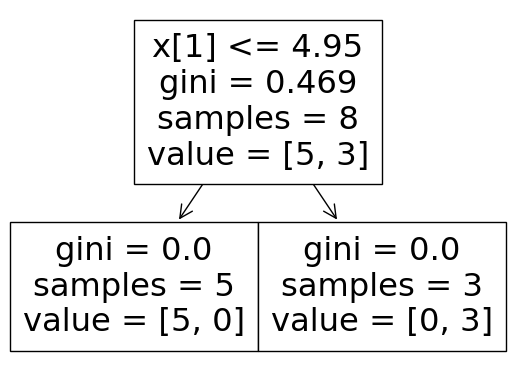

C:\Users\susha\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\susha\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


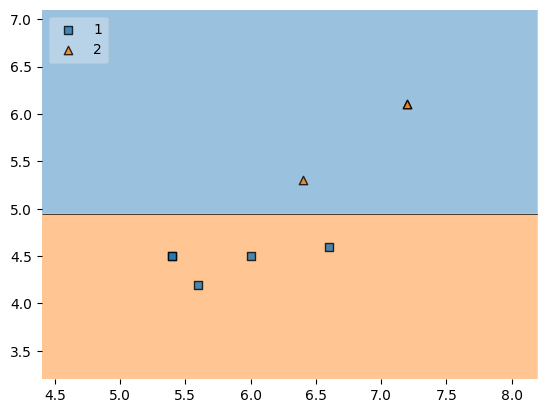

In [24]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [25]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_length,petal_length,species
78,6.0,4.5,1
111,6.4,5.3,2
96,5.7,4.2,1
58,6.6,4.6,1
142,5.8,5.1,2
109,7.2,6.1,2
94,5.6,4.2,1
138,6.0,4.8,2


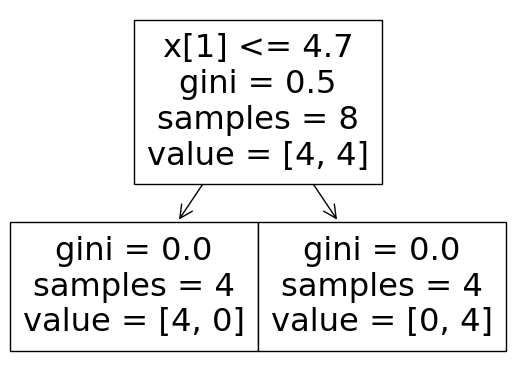

C:\Users\susha\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\susha\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


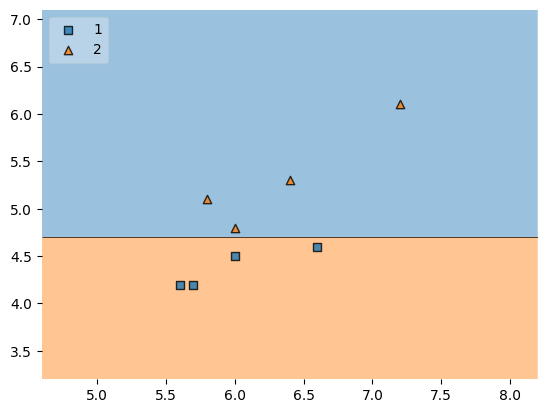

In [26]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Prediction (Aggregation)

In [27]:
df_test

,sepal_length,petal_length,species
71,6.1,4.0,1
61,5.9,4.2,1
97,6.2,4.3,1
62,6.0,4.0,1
76,6.8,4.8,1


In [30]:
print("Predictor 1 : ", dt_bag1.predict(np.array([5.9, 4.8	]).reshape(1,2)))
print("Predictor 2 : ", dt_bag2.predict(np.array([5.9, 4.8]).reshape(1,2)))
print("Predictor 3 : ", dt_bag3.predict(np.array([5.9, 4.8]).reshape(1,2)))

Predictor 1 :  [2]
Predictor 2 :  [1]
Predictor 3 :  [2]


C:\Users\susha\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\susha\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\susha\anaconda3\envs\machine_learning\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Pasting 

In [32]:
# row sampling without replacement

In [33]:
df_train

,sepal_length,petal_length,species
84,5.4,4.5,1
138,6.0,4.8,2
142,5.8,5.1,2
96,5.7,4.2,1
109,7.2,6.1,2
77,6.7,5.0,1
94,5.6,4.2,1
111,6.4,5.3,2
58,6.6,4.6,1
78,6.0,4.5,1


In [34]:
df_train.sample(8)

,sepal_length,petal_length,species
96,5.7,4.2,1
84,5.4,4.5,1
58,6.6,4.6,1
138,6.0,4.8,2
77,6.7,5.0,1
111,6.4,5.3,2
142,5.8,5.1,2
109,7.2,6.1,2


## Random Subspaces

In [36]:
df1 = sns.load_dataset('iris')

In [37]:
df1 = df1.sample(10)

In [38]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
78,6.0,2.9,4.5,1.5,versicolor
126,6.2,2.8,4.8,1.8,virginica
129,7.2,3.0,5.8,1.6,virginica
32,5.2,4.1,1.5,0.1,setosa
85,6.0,3.4,4.5,1.6,versicolor
48,5.3,3.7,1.5,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
119,6.0,2.2,5.0,1.5,virginica
109,7.2,3.6,6.1,2.5,virginica
144,6.7,3.3,5.7,2.5,virginica


In [45]:
# column sampling with replacement

df1.sample(2, replace=True, axis=1)

,sepal_length,sepal_width
78,6.0,2.9
126,6.2,2.8
129,7.2,3.0
32,5.2,4.1
85,6.0,3.4
48,5.3,3.7
98,5.1,2.5
119,6.0,2.2
109,7.2,3.6
144,6.7,3.3


## Random Patches

In [59]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
78,6.0,2.9,4.5,1.5,versicolor
126,6.2,2.8,4.8,1.8,virginica
129,7.2,3.0,5.8,1.6,virginica
32,5.2,4.1,1.5,0.1,setosa
85,6.0,3.4,4.5,1.6,versicolor
48,5.3,3.7,1.5,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
119,6.0,2.2,5.0,1.5,virginica
109,7.2,3.6,6.1,2.5,virginica
144,6.7,3.3,5.7,2.5,virginica


In [61]:
# column & row sampling with replacement

df.sample(8, replace=True).sample(2, replace=True, axis=1)

,species,sepal_length
79,1,5.7
114,2,5.8
114,2,5.8
100,2,6.3
68,1,6.2
140,2,6.7
142,2,5.8
75,1,6.6
